## Cycle 3 Iteration 2 description 

I have reduced number of instances (from 40 000 in Iteration 1 to 20 000 in Iteration 2) to understand whether number of instances has an impact on accuracy. 

## Import libraries 

In [1]:
import pandas as pd

## Import CSV

In [2]:
# Specify the row number to skip
rows_to_skip = [381729,1896392] # Had to to exclude these rows as they caused issues with importing the CSV

# Read the CSV file, skipping the specified rows
df = pd.read_csv('books_rating.csv', skiprows=rows_to_skip)

# Display the DataFrame
print(df)


                 Id                           Title  Price         User_id  \
0        1882931173  Its Only Art If Its Well Hung!    NaN   AVCGYZL8FQQTD   
1        0826414346        Dr. Seuss: American Icon    NaN  A30TK6U7DNS82R   
2        0826414346        Dr. Seuss: American Icon    NaN  A3UH4UZ4RSVO82   
3        0826414346        Dr. Seuss: American Icon    NaN  A2MVUWT453QH61   
4        0826414346        Dr. Seuss: American Icon    NaN  A22X4XUPKF66MR   
...             ...                             ...    ...             ...   
2999993  B000NSLVCU             The Idea of History    NaN             NaN   
2999994  B000NSLVCU             The Idea of History    NaN  A1SMUB9ASL5L9Y   
2999995  B000NSLVCU             The Idea of History    NaN  A2AQMEKZKK5EE4   
2999996  B000NSLVCU             The Idea of History    NaN  A18SQGYBKS852K   
2999997  B000NSLVCU             The Idea of History    NaN             NaN   

                                profileName review/helpfulness 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999998 entries, 0 to 2999997
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB


In [4]:
# Add a new column for the length of review text
df["length_of_review_text"] = df["review/text"].apply(lambda x: len(x) if isinstance(x, str) else 0)

In [5]:
df["length_of_review_text"].mean()

822.6316940877961

With a mean average of 823 characters per review, this data is preferable to the shorter Tweet data in previous iterations. 

## Preprocessing 

In [6]:
df['review/score'].unique()

array([4., 5., 1., 3., 2.])

/var/folders/cr/qlkb4cqn3vn0pb1jrc5s04800000gn/T/ipykernel_14781/2779627632.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


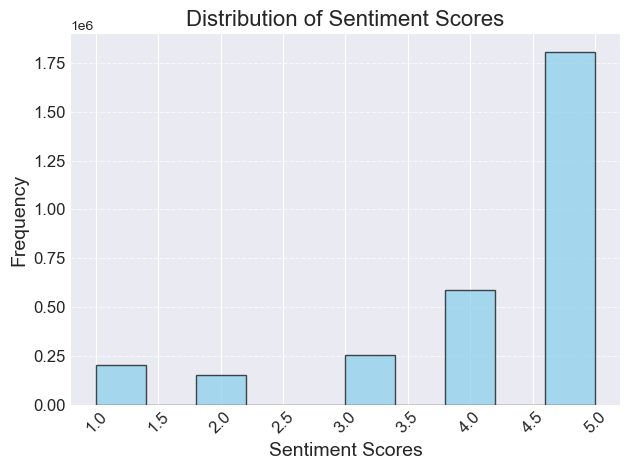

In [7]:
import matplotlib.pyplot as plt

# Set the style of the plot
plt.style.use('seaborn-darkgrid')

# Create the histogram
plt.hist(df['review/score'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Sentiment Scores', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Sentiment Scores', fontsize=16)

# Add grid and adjust tick parameters
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels by 45 degrees
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [8]:
df['review/score'].value_counts()

review/score
5.0    1807342
4.0     585615
3.0     254295
1.0     201688
2.0     151058
Name: count, dtype: int64

Author note: This data is imbalanced. 

Author note: In order to guide the workload of a Customer Success Manager, the following grouping would make sense: 

Positive Sentiments:

Score >= 4

Neutral Sentiments:

Score = 3 

Negative Sentiments:

Score <= 2

In [9]:
# Define a function to map sentiments to sub-groups
def map_review_score_to_subgroup(review_score):
    if review_score <= 2:
        return 'Negative'
    elif review_score == 3:
        return 'Neutral'
    else:
        return 'Positive'

# Apply the function to create a new column for sub-groups
df['sentiment_subgroup'] = df['review/score'].apply(map_review_score_to_subgroup)

# Display the DataFrame
print(df)

                 Id                           Title  Price         User_id  \
0        1882931173  Its Only Art If Its Well Hung!    NaN   AVCGYZL8FQQTD   
1        0826414346        Dr. Seuss: American Icon    NaN  A30TK6U7DNS82R   
2        0826414346        Dr. Seuss: American Icon    NaN  A3UH4UZ4RSVO82   
3        0826414346        Dr. Seuss: American Icon    NaN  A2MVUWT453QH61   
4        0826414346        Dr. Seuss: American Icon    NaN  A22X4XUPKF66MR   
...             ...                             ...    ...             ...   
2999993  B000NSLVCU             The Idea of History    NaN             NaN   
2999994  B000NSLVCU             The Idea of History    NaN  A1SMUB9ASL5L9Y   
2999995  B000NSLVCU             The Idea of History    NaN  A2AQMEKZKK5EE4   
2999996  B000NSLVCU             The Idea of History    NaN  A18SQGYBKS852K   
2999997  B000NSLVCU             The Idea of History    NaN             NaN   

                                profileName review/helpfulness 

In [10]:
df['sentiment_subgroup'].value_counts()

sentiment_subgroup
Positive    2392957
Negative     352746
Neutral      254295
Name: count, dtype: int64

/var/folders/cr/qlkb4cqn3vn0pb1jrc5s04800000gn/T/ipykernel_14781/2723297244.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


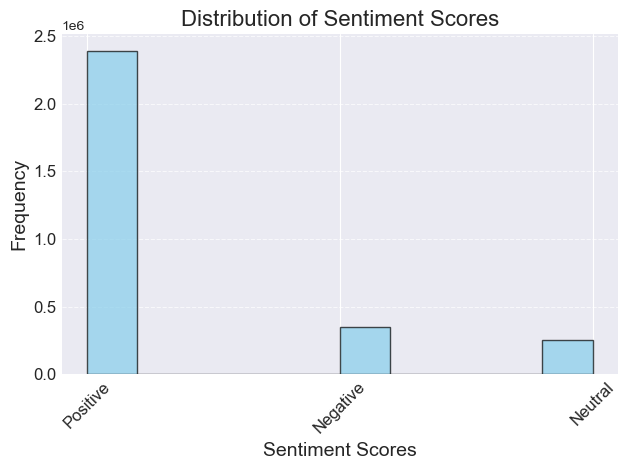

In [11]:
import matplotlib.pyplot as plt

# Set the style of the plot
plt.style.use('seaborn-darkgrid')

# Create the histogram
plt.hist(df['sentiment_subgroup'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Sentiment Scores', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Sentiment Scores', fontsize=16)

# Add grid and adjust tick parameters
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels by 45 degrees
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

### Delete non-relevant columns  

In [12]:
# Keep only the desired columns
df = df[['review/text', 'sentiment_subgroup']]

# Drop rows with any missing values in the remaining columns
df.dropna(inplace=True)

# Display the DataFrame
print(df)

                                               review/text sentiment_subgroup
0        This is only for Julie Strain fans. It's a col...           Positive
1        I don't care much for Dr. Seuss but after read...           Positive
2        If people become the books they read and if "t...           Positive
3        Theodore Seuss Geisel (1904-1991), aka &quot;D...           Positive
4        Philip Nel - Dr. Seuss: American IconThis is b...           Positive
...                                                    ...                ...
2999993  This is an extremely difficult book to digest,...           Positive
2999994  This is pretty interesting. Collingwood seems ...           Positive
2999995  This is a good book but very esoteric. "What i...           Positive
2999996  My daughter, a freshman at Indiana University,...           Positive
2999997  The guy has a few good ideas but, reader, bewa...           Negative

[2999990 rows x 2 columns]


### Delete null values 

In [13]:
# Count null values in 'review/text' column before dropping
null_count_before = df['review/text'].isnull().sum()

# Drop rows with null values in 'review/text' column
df.dropna(subset=['review/text'], inplace=True)

# Count null values in 'review/text' column after dropping
null_count_after = df['review/text'].isnull().sum()

# Calculate the count of dropped rows
dropped_count = null_count_before - null_count_after

# Print the count of dropped rows
print("Number of dropped rows:", dropped_count)

Number of dropped rows: 0


### Reduce the size of dataframe in order to improve speed 

In [14]:
# Create a new DataFrame containing the first 20000 rows of df
df = df.head(20000)

# Display the new DataFrame
print(df)

                                             review/text sentiment_subgroup
0      This is only for Julie Strain fans. It's a col...           Positive
1      I don't care much for Dr. Seuss but after read...           Positive
2      If people become the books they read and if "t...           Positive
3      Theodore Seuss Geisel (1904-1991), aka &quot;D...           Positive
4      Philip Nel - Dr. Seuss: American IconThis is b...           Positive
...                                                  ...                ...
19995  I truly cannot remember the last time I have r...           Positive
19996  I am only sixteen years old and i just finishe...           Positive
19997  I already wrote a review for this book; howeve...           Positive
19998  I don't know what an average reader like me ca...           Positive
19999  i felt i had to put my two cents in. I read th...           Positive

[20000 rows x 2 columns]


In [15]:
df['sentiment_subgroup'].value_counts()

sentiment_subgroup
Positive    16094
Negative     2309
Neutral      1597
Name: count, dtype: int64

/var/folders/cr/qlkb4cqn3vn0pb1jrc5s04800000gn/T/ipykernel_14781/2723297244.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


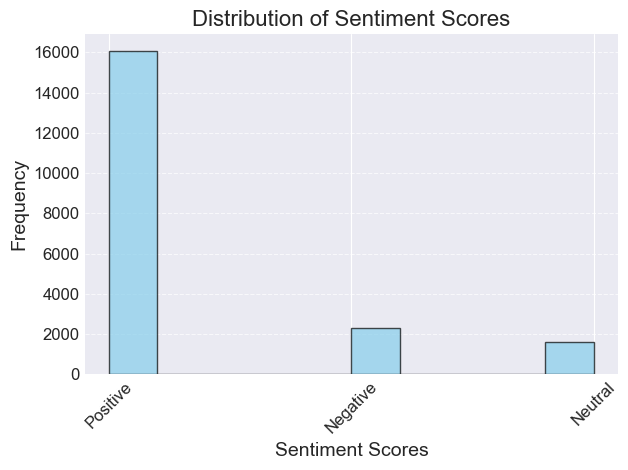

In [16]:
import matplotlib.pyplot as plt

# Set the style of the plot
plt.style.use('seaborn-darkgrid')

# Create the histogram
plt.hist(df['sentiment_subgroup'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Sentiment Scores', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Sentiment Scores', fontsize=16)

# Add grid and adjust tick parameters
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels by 45 degrees
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

## Tokenizing

In [17]:
import nltk # Natural Language Toolkit
from nltk.tokenize import word_tokenize

nltk.download('punkt')  # Ensure that you have the 'punkt' tokenizer models downloaded

# Tokenize the text in the 'content' column
df['tokens'] = df['review/text'].apply(word_tokenize)

# Display the DataFrame with tokens
print(df.head())

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/matthewbatchelor/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                         review/text sentiment_subgroup  \
0  This is only for Julie Strain fans. It's a col...           Positive   
1  I don't care much for Dr. Seuss but after read...           Positive   
2  If people become the books they read and if "t...           Positive   
3  Theodore Seuss Geisel (1904-1991), aka &quot;D...           Positive   
4  Philip Nel - Dr. Seuss: American IconThis is b...           Positive   

                                              tokens  
0  [This, is, only, for, Julie, Strain, fans, ., ...  
1  [I, do, n't, care, much, for, Dr., Seuss, but,...  
2  [If, people, become, the, books, they, read, a...  
3  [Theodore, Seuss, Geisel, (, 1904-1991, ), ,, ...  
4  [Philip, Nel, -, Dr., Seuss, :, American, Icon...  


In [18]:
df

,review/text,sentiment_subgroup,tokens
0,This is only for Julie Strain fans. It's a col...,Positive,"[This, is, only, for, Julie, Strain, fans, ., ..."
1,I don't care much for Dr. Seuss but after read...,Positive,"[I, do, n't, care, much, for, Dr., Seuss, but,..."
2,"If people become the books they read and if ""t...",Positive,"[If, people, become, the, books, they, read, a..."
3,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",Positive,"[Theodore, Seuss, Geisel, (, 1904-1991, ), ,, ..."
4,Philip Nel - Dr. Seuss: American IconThis is b...,Positive,"[Philip, Nel, -, Dr., Seuss, :, American, Icon..."
...,...,...,...
19995,I truly cannot remember the last time I have r...,Positive,"[I, truly, can, not, remember, the, last, time..."
19996,I am only sixteen years old and i just finishe...,Positive,"[I, am, only, sixteen, years, old, and, i, jus..."
19997,I already wrote a review for this book; howeve...,Positive,"[I, already, wrote, a, review, for, this, book..."
19998,I don't know what an average reader like me ca...,Positive,"[I, do, n't, know, what, an, average, reader, ..."


## Preprocessing tokenized text data

- Lowercasing: Convert all words to lowercase to ensure consistency and prevent the model from treating words with different cases as different entities.

- Removing punctuation: Remove punctuation marks such as commas, periods, and quotation marks. Punctuation generally does not carry semantic meaning and can introduce noise into the embeddings.

- Removing stop words: As mentioned earlier, stop words are common words such as "the," "is," and "and" that occur frequently but typically do not contribute much to the meaning of the text. Removing them can reduce the dimensionality of the data and improve the efficiency of the Word2Vec model.

- Handling numerical values: Depending on the specific use case, you may choose to remove or replace numerical values with placeholders. In some cases, numerical values may not be relevant to the semantics of the text and can be treated as noise.

- Removing blank spaces: Should be treated as noise and deleted 

- Handling special characters: Special characters, symbols, and emojis may need to be handled appropriately based on the specific requirements of the application. You might choose to remove them, replace them with special tokens, or even treat them as separate entities

- Removing blank rows

- Removing words with just one letter: These are stealth stop words 

- Token normalization: This involves techniques such as stemming or lemmatization to reduce words to their base or root forms. For example, "running," "runs," and "ran" may all be reduced to the base form "run." This helps in capturing semantic similarities between related words.

- Handling out-of-vocabulary words: It's essential to handle words that are not present in the vocabulary of the Word2Vec model. This could involve techniques like using subword embeddings (e.g., FastText) or replacing unknown words with a special token.



### Lowercasing

Convert all words to lowercase to ensure consistency and prevent the model from treating words with different cases as different entities.

In [19]:
# Function to lowercase each word in a list of tokens
def lowercase_tokens(tokens_list):
    return [word.lower() for word in tokens_list]

# Apply lowercase conversion to each list of tokens in the 'tokens' column
df.loc[:, 'tokens'] = df['tokens'].apply(lowercase_tokens)

In [20]:
df['tokens']

0        [this, is, only, for, julie, strain, fans, ., ...
1        [i, do, n't, care, much, for, dr., seuss, but,...
2        [if, people, become, the, books, they, read, a...
3        [theodore, seuss, geisel, (, 1904-1991, ), ,, ...
4        [philip, nel, -, dr., seuss, :, american, icon...
                               ...                        
19995    [i, truly, can, not, remember, the, last, time...
19996    [i, am, only, sixteen, years, old, and, i, jus...
19997    [i, already, wrote, a, review, for, this, book...
19998    [i, do, n't, know, what, an, average, reader, ...
19999    [i, felt, i, had, to, put, my, two, cents, in,...
Name: tokens, Length: 20000, dtype: object

### Removing punctuation

Remove punctuation marks such as commas, periods, and quotation marks. Punctuation generally does not carry semantic meaning and can introduce noise into the embeddings. This code first checks if the value is a string before applying the regex substitution. If the value is not a string (e.g., NaN or float), it returns an empty string. This ensures that the re.sub function receives only string inputs, avoiding the TypeError.

In [21]:
import re

# Apply punctuation removal using a lambda function
df['tokens'] = df['tokens'].apply(lambda tokens_list: [re.sub(r'[^\w\s]', '', word) for word in tokens_list] if isinstance(tokens_list, list) else [])

In [22]:
df['tokens']

0        [this, is, only, for, julie, strain, fans, , i...
1        [i, do, nt, care, much, for, dr, seuss, but, a...
2        [if, people, become, the, books, they, read, a...
3        [theodore, seuss, geisel, , 19041991, , , aka,...
4        [philip, nel, , dr, seuss, , american, iconthi...
                               ...                        
19995    [i, truly, can, not, remember, the, last, time...
19996    [i, am, only, sixteen, years, old, and, i, jus...
19997    [i, already, wrote, a, review, for, this, book...
19998    [i, do, nt, know, what, an, average, reader, l...
19999    [i, felt, i, had, to, put, my, two, cents, in,...
Name: tokens, Length: 20000, dtype: object

### Removing stop-words 

Stop words are common words such as "the," "is," and "and" that occur frequently but typically do not contribute much to the meaning of the text. Removing them can reduce the dimensionality of the data and improve the efficiency of the Word2Vec model.

In [23]:
from nltk.corpus import stopwords

# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Get the English stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Remove stopwords from the 'tokens' column
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/matthewbatchelor/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
df['tokens']

0        [julie, strain, fans, , collection, photos, , ...
1        [nt, care, much, dr, seuss, reading, philip, n...
2        [people, become, books, read, , child, father,...
3        [theodore, seuss, geisel, , 19041991, , , aka,...
4        [philip, nel, , dr, seuss, , american, iconthi...
                               ...                        
19995    [truly, remember, last, time, read, something,...
19996    [sixteen, years, old, finished, reading, one, ...
19997    [already, wrote, review, book, , however, , wo...
19998    [nt, know, average, reader, like, say, marvelo...
19999    [felt, put, two, cents, , read, book, several,...
Name: tokens, Length: 20000, dtype: object

### Removing blank spaces

Author note: Based on the print out of the tokens column above, I can see some blank spaces (' '). I will remove these to reduce noise in my model 

In [25]:
# Remove blank spaces from the list of tokens
df['tokens'] = df['tokens'].apply(lambda tokens_list: [token for token in tokens_list if token.strip() != ''])

# Display the updated DataFrame
print(df['tokens'])

0        [julie, strain, fans, collection, photos, 80, ...
1        [nt, care, much, dr, seuss, reading, philip, n...
2        [people, become, books, read, child, father, m...
3        [theodore, seuss, geisel, 19041991, aka, quot,...
4        [philip, nel, dr, seuss, american, iconthis, b...
                               ...                        
19995    [truly, remember, last, time, read, something,...
19996    [sixteen, years, old, finished, reading, one, ...
19997    [already, wrote, review, book, however, would,...
19998    [nt, know, average, reader, like, say, marvelo...
19999    [felt, put, two, cents, read, book, several, y...
Name: tokens, Length: 20000, dtype: object


### Handling numerical values

This code will remove all tokens containing only numerical values from the 'tokens' column.

In [26]:
df['tokens'] = df['tokens'].apply(lambda x: [token for token in x if not token.isdigit()])

In [27]:
df['tokens']

0        [julie, strain, fans, collection, photos, page...
1        [nt, care, much, dr, seuss, reading, philip, n...
2        [people, become, books, read, child, father, m...
3        [theodore, seuss, geisel, aka, quot, dr, seuss...
4        [philip, nel, dr, seuss, american, iconthis, b...
                               ...                        
19995    [truly, remember, last, time, read, something,...
19996    [sixteen, years, old, finished, reading, one, ...
19997    [already, wrote, review, book, however, would,...
19998    [nt, know, average, reader, like, say, marvelo...
19999    [felt, put, two, cents, read, book, several, y...
Name: tokens, Length: 20000, dtype: object

### Handling special characters

This code will remove all non-alphanumeric characters from each token in the 'tokens' column of your DataFrame.

In [28]:
df['tokens'] = df['tokens'].apply(lambda x: [re.sub(r'\W', '', token) for token in x])

In [29]:
df['tokens']

0        [julie, strain, fans, collection, photos, page...
1        [nt, care, much, dr, seuss, reading, philip, n...
2        [people, become, books, read, child, father, m...
3        [theodore, seuss, geisel, aka, quot, dr, seuss...
4        [philip, nel, dr, seuss, american, iconthis, b...
                               ...                        
19995    [truly, remember, last, time, read, something,...
19996    [sixteen, years, old, finished, reading, one, ...
19997    [already, wrote, review, book, however, would,...
19998    [nt, know, average, reader, like, say, marvelo...
19999    [felt, put, two, cents, read, book, several, y...
Name: tokens, Length: 20000, dtype: object

### Removing blank rows   

In the print-out above, I see cases (such as ID 39995) where the row is blank '[]'. These may add noise to the model and I will remove. 

In [30]:
# Count the number of rows before removing blank rows
num_rows_before = len(df)

# Remove rows with blank lists in the 'tokens' column
df = df[df['tokens'].apply(lambda tokens_list: tokens_list != [])]

# Count the number of rows after removing blank rows
num_rows_after = len(df)

# Calculate the number of rows deleted
num_rows_deleted = num_rows_before - num_rows_after

# Print the number of rows deleted
print("Number of rows deleted:", num_rows_deleted)

Number of rows deleted: 1


### Removing words with just one letter

These are hidden stop-words

In [31]:
# Define the target words to count
target_words = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

# Initialize counts for each target word
word_counts = {word: 0 for word in target_words}

# Iterate over the tokens and count occurrences of target words
for tokens_list in df['tokens']:
    for word in tokens_list:
        for target_word in target_words:
            if target_word == word:
                word_counts[target_word] += 1
            elif target_word.strip() == word:
                word_counts[target_word] += 1

# Print the word counts
for word, count in word_counts.items():
    print(f"Occurrences of '{word}': {count}")

Occurrences of 'a': 0
Occurrences of 'b': 151
Occurrences of 'c': 137
Occurrences of 'd': 0
Occurrences of 'e': 122
Occurrences of 'f': 76
Occurrences of 'g': 47
Occurrences of 'h': 45
Occurrences of 'i': 0
Occurrences of 'j': 131
Occurrences of 'k': 45
Occurrences of 'l': 95
Occurrences of 'm': 0
Occurrences of 'n': 86
Occurrences of 'o': 0
Occurrences of 'p': 194
Occurrences of 'q': 11
Occurrences of 'r': 70
Occurrences of 's': 0
Occurrences of 't': 0
Occurrences of 'u': 71
Occurrences of 'v': 33
Occurrences of 'w': 76
Occurrences of 'x': 56
Occurrences of 'y': 0
Occurrences of 'z': 21


In [32]:
# Delete occurrences of target_words from df['tokens']
df['tokens'] = df['tokens'].apply(lambda tokens_list: [word for word in tokens_list if word not in target_words and word.strip() not in target_words])

/var/folders/cr/qlkb4cqn3vn0pb1jrc5s04800000gn/T/ipykernel_14781/3323392164.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = df['tokens'].apply(lambda tokens_list: [word for word in tokens_list if word not in target_words and word.strip() not in target_words])


In [33]:
df['tokens']

0        [julie, strain, fans, collection, photos, page...
1        [nt, care, much, dr, seuss, reading, philip, n...
2        [people, become, books, read, child, father, m...
3        [theodore, seuss, geisel, aka, quot, dr, seuss...
4        [philip, nel, dr, seuss, american, iconthis, b...
                               ...                        
19995    [truly, remember, last, time, read, something,...
19996    [sixteen, years, old, finished, reading, one, ...
19997    [already, wrote, review, book, however, would,...
19998    [nt, know, average, reader, like, say, marvelo...
19999    [felt, put, two, cents, read, book, several, y...
Name: tokens, Length: 19999, dtype: object

### Token normalization

This involves techniques such as stemming or lemmatization to reduce words to their base or root forms. For example, "running," "runs," and "ran" may all be reduced to the base form "run." This helps in capturing semantic similarities between related words.

In [34]:
from nltk.stem import PorterStemmer

# Initialize PorterStemmer
stemmer = PorterStemmer()

# Apply stemming to tokens
df['tokens'] = df['tokens'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x]))

/var/folders/cr/qlkb4cqn3vn0pb1jrc5s04800000gn/T/ipykernel_14781/1729550754.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = df['tokens'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x]))


In [35]:
df

,review/text,sentiment_subgroup,tokens
0,This is only for Julie Strain fans. It's a col...,Positive,juli strain fan collect photo page worth nice ...
1,I don't care much for Dr. Seuss but after read...,Positive,nt care much dr seuss read philip nel book cha...
2,"If people become the books they read and if ""t...",Positive,peopl becom book read child father man dr seus...
3,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",Positive,theodor seuss geisel aka quot dr seuss quot on...
4,Philip Nel - Dr. Seuss: American IconThis is b...,Positive,philip nel dr seuss american iconthi basic aca...
...,...,...,...
19995,I truly cannot remember the last time I have r...,Positive,truli rememb last time read someth imaginit in...
19996,I am only sixteen years old and i just finishe...,Positive,sixteen year old finish read one hundr year so...
19997,I already wrote a review for this book; howeve...,Positive,alreadi wrote review book howev would like cor...
19998,I don't know what an average reader like me ca...,Positive,nt know averag reader like say marvel epic lov...


### Handling out-of-vocabulary words

Author note: It seemed I couldn't do this until I had trained a Word2Vec model 

## Reset index 

In [36]:
df.reset_index(drop=True, inplace=True)

## Word embedding 

In [37]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import numpy as np

# Tokenize text in the 'content' column
df['tokens'] = df['review/text'].apply(word_tokenize)

# Load pre-trained Word2Vec model 
word2vec_model = Word2Vec(df['tokens'], min_count=1)

# Function to apply word embeddings
def apply_word_embeddings(tokens):
    word_vectors = []
    for token in tokens:
        if token in word2vec_model.wv:
            word_vector = word2vec_model.wv[token]  # Get word vector
            word_vectors.append(word_vector)
    if word_vectors:
        tweet_vector = np.mean(word_vectors, axis=0)  # Aggregate word vectors
        return tweet_vector
    else:
        return None

# Apply word embeddings to the 'tokens' column
df['word_embeddings'] = df['tokens'].apply(apply_word_embeddings)

# Drop rows with None values in 'word_embeddings' column
df = df.dropna(subset=['word_embeddings'])

/var/folders/cr/qlkb4cqn3vn0pb1jrc5s04800000gn/T/ipykernel_14781/1134887140.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = df['review/text'].apply(word_tokenize)
/var/folders/cr/qlkb4cqn3vn0pb1jrc5s04800000gn/T/ipykernel_14781/1134887140.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_embeddings'] = df['tokens'].apply(apply_word_embeddings)


In [38]:
df.head()

,review/text,sentiment_subgroup,tokens,word_embeddings
0,This is only for Julie Strain fans. It's a col...,Positive,"[This, is, only, for, Julie, Strain, fans, ., ...","[1.3298819, 0.4799417, -0.07709285, -0.5779318..."
1,I don't care much for Dr. Seuss but after read...,Positive,"[I, do, n't, care, much, for, Dr., Seuss, but,...","[0.8130692, 0.09846953, 0.3320659, -0.5629833,..."
2,"If people become the books they read and if ""t...",Positive,"[If, people, become, the, books, they, read, a...","[1.0063611, 0.26687682, 0.3497686, -0.6075473,..."
3,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",Positive,"[Theodore, Seuss, Geisel, (, 1904-1991, ), ,, ...","[0.7939554, -0.22112651, 0.036260705, 0.034121..."
4,Philip Nel - Dr. Seuss: American IconThis is b...,Positive,"[Philip, Nel, -, Dr., Seuss, :, American, Icon...","[1.0794126, -0.0703178, 0.2017178, -0.4935657,..."


In [39]:
from sklearn.preprocessing import LabelEncoder

# Drop columns except 'sentiment_subgroup' and word embeddings
columns_to_keep = ['sentiment_subgroup', 'word_embeddings']
df = df[columns_to_keep]

# Convert 'sentiment_subgroup' into numeric values
label_encoder = LabelEncoder()
df['sentiment_subgroup'] = label_encoder.fit_transform(df['sentiment_subgroup'])

# Display the first few rows of the modified DataFrame
print(df.head())

   sentiment_subgroup                                    word_embeddings
0                   2  [1.3298819, 0.4799417, -0.07709285, -0.5779318...
1                   2  [0.8130692, 0.09846953, 0.3320659, -0.5629833,...
2                   2  [1.0063611, 0.26687682, 0.3497686, -0.6075473,...
3                   2  [0.7939554, -0.22112651, 0.036260705, 0.034121...
4                   2  [1.0794126, -0.0703178, 0.2017178, -0.4935657,...


## Train test split and model training 

In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from scikeras.wrappers import KerasClassifier

# Assuming 'df' contains the DataFrame with columns 'sentiment_subgroup' and 'word_embeddings'

# Splitting the data into features (X) and target (y)
X = np.array(df['word_embeddings'].tolist())  # Convert word embeddings to numpy array
y = np.array(df['sentiment_subgroup'])

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network model
def create_model(optimizer='adam'):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(3, activation='softmax')  # Assuming 3 classes for sentiment_subgroup
    ])
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create a KerasClassifier object
keras_model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the hyperparameters grid
param_grid = {
    'batch_size': [16, 32],
    'epochs': [10, 20, 30],
    'optimizer': ['adam', 'rmsprop'],
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=keras_model, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Predictions
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)

# Calculate metrics for train set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Calculate metrics for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print the metrics
print("Train Accuracy:", train_accuracy)
print("Train Precision:", train_precision)
print("Train Recall:", train_recall)
print("Train F1 Score:", train_f1)
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1)

2024-03-05 14:41:29.217657: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Fitting 3 folds for each of 12 candidates, totalling 36 fits


/Users/matthewbatchelor/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/matthewbatchelor/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/matthewbatchelor/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/matthewbatchelor/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Err

Best Parameters: {'batch_size': 32, 'epochs': 10, 'optimizer': 'adam'}
Train Accuracy: 0.8345521595099694
Train Precision: 0.820378138965896
Train Recall: 0.8345521595099694
Train F1 Score: 0.7919110172260962
Test Accuracy: 0.8245
Test Precision: 0.7649531098364962
Test Recall: 0.8245
Test F1 Score: 0.7781959981446838
[CV] END ...........batch_size=16, epochs=10, optimizer=adam; total time=  35.5s
[CV] END ........batch_size=16, epochs=10, optimizer=rmsprop; total time=  27.2s
[CV] END ...........batch_size=16, epochs=20, optimizer=adam; total time= 1.4min
[CV] END ...........batch_size=16, epochs=30, optimizer=adam; total time= 1.2min
[CV] END ........batch_size=16, epochs=30, optimizer=rmsprop; total time= 1.4min
[CV] END ...........batch_size=32, epochs=30, optimizer=adam; total time=  45.8s
[CV] END ...........batch_size=16, epochs=10, optimizer=adam; total time=  48.5s
[CV] END ...........batch_size=16, epochs=20, optimizer=adam; total time= 1.0min
[CV] END ........batch_size=16, 

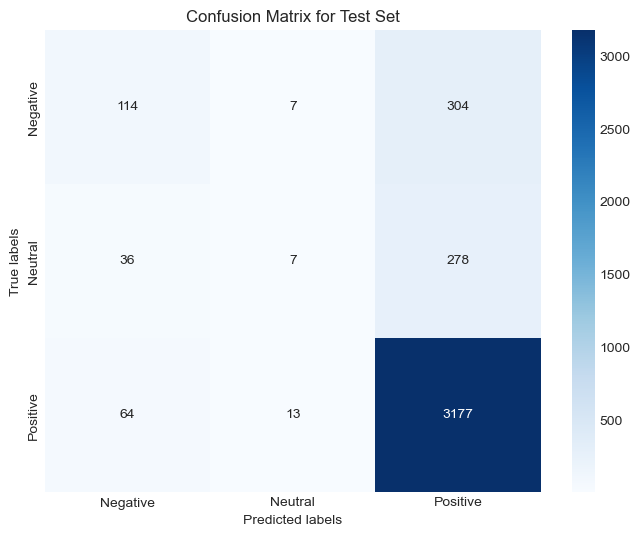

Confusion Matrix for Test Set:
[[ 114    7  304]
 [  36    7  278]
 [  64   13 3177]]


In [41]:
# Confusion matrix for test set
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix for test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Define class labels
class_labels = ['Negative', 'Neutral', 'Positive']

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Test Set')
plt.show()
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix for Test Set:")
print(conf_matrix_test)